<a href="https://colab.research.google.com/github/lucaspn017/using_statistical_descriptions/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# The dataset is related to some ratings that are asign for some films.
# It is necessary to change the column names to portuguese, to turn the interpretation more easy.


In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")

In [ ]:
notas.columns = ["usuarioId", "filmeId", "pontuacao", "tempo"]
notas

,usuarioId,filmeId,pontuacao,tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


<Axes: ylabel='Frequency'>

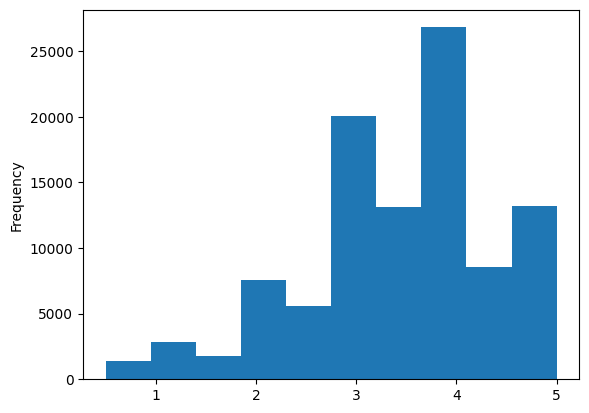

In [ ]:
notas["pontuacao"].unique()
notas["pontuacao"].mean()
notas["pontuacao"].median()
notas["pontuacao"].plot(kind="hist")

#Notice that its not possible to observe the descriptive statistical measure in histogram in a esaily way.

#To better visualization of this parameters, we use the boxplot.

In [ ]:
notas["pontuacao"].describe()

,pontuacao
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='pontuacao'>

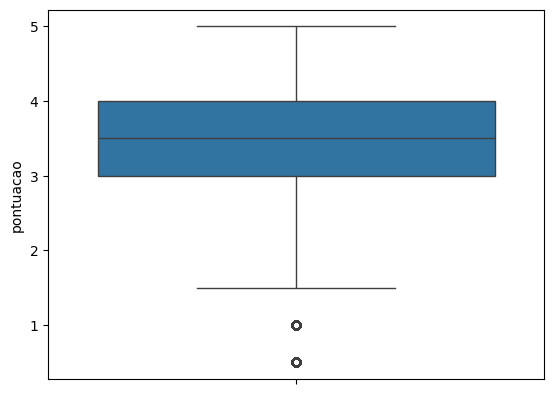

In [ ]:
sns.boxplot(notas["pontuacao"])

In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
medias_por_filme = notas.groupby("filmeId")["pontuacao"].mean()
medias_por_filme.head()

,pontuacao
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

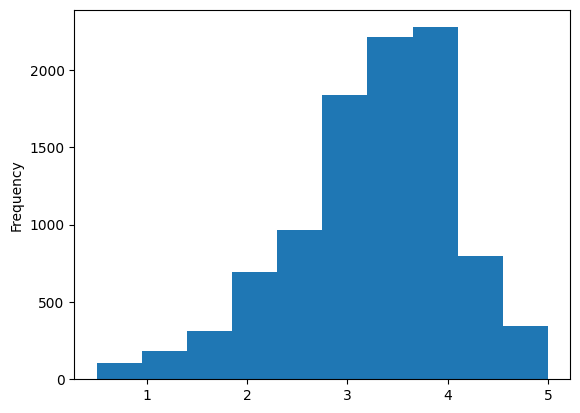

In [ ]:
medias_por_filme.plot(kind="hist")

# Previously, we group films by Id to observe the score of each of them by their respective averages.

# In the following graphic, we use the displot, to detect datas more accuracy.

<Axes: ylabel='pontuacao'>

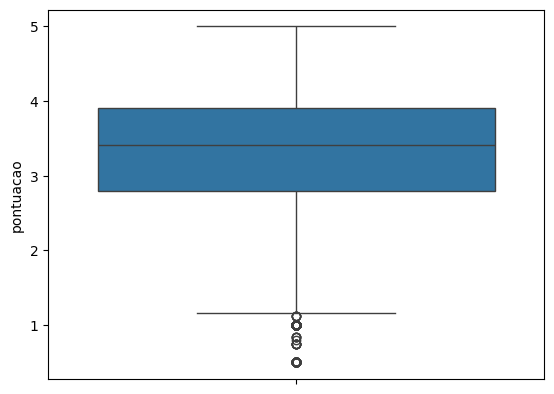

In [ ]:
sns.boxplot(medias_por_filme)

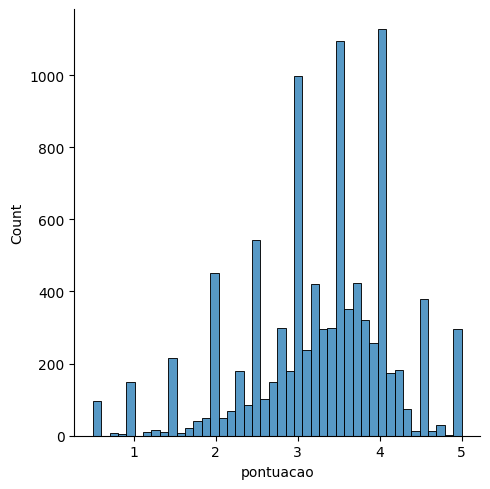

In [ ]:
sns.displot(medias_por_filme)
# No displot temos uma precisão maior dos dados, haja vista
# que ele detectará conjuntos menores de dados.

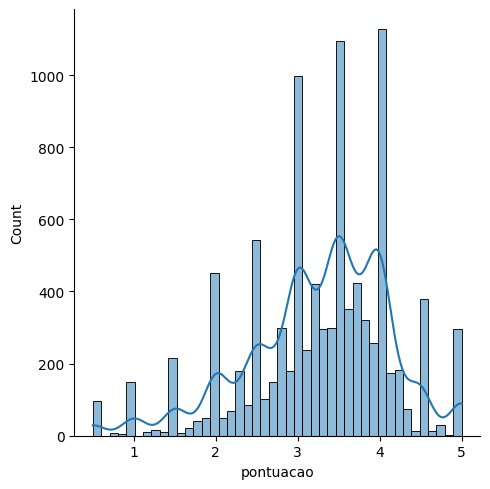

In [ ]:
sns.displot(medias_por_filme,kde=True)
# O pyplot faz com que mais dados apareçam e torna
# a amostra dos dados mais específica.

Text(0.5, 1.0, 'Histograma das médias dos filmes')

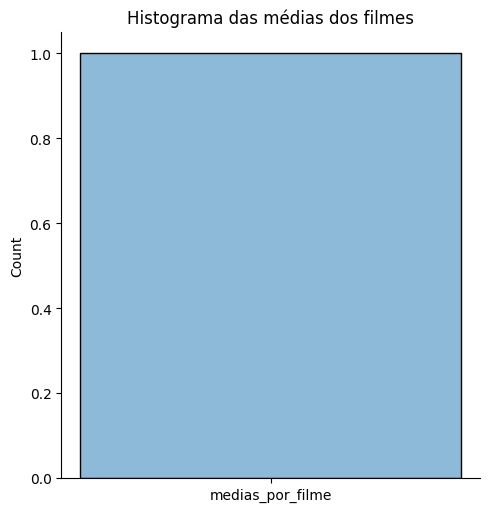

In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
#medias_por_filme = filmes.groupby("filmeId")["nota"].mean()
sns.displot("medias_por_filme", kde=True)
plt.title("Histograma das médias dos filmes")

In [ ]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

In [ ]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição do orçamento dos filmes")
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"])

In [ ]:
tmdb["original_language"].unique() #variável categórica (existem categorias bem específicas para seguir)

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

<Axes: >

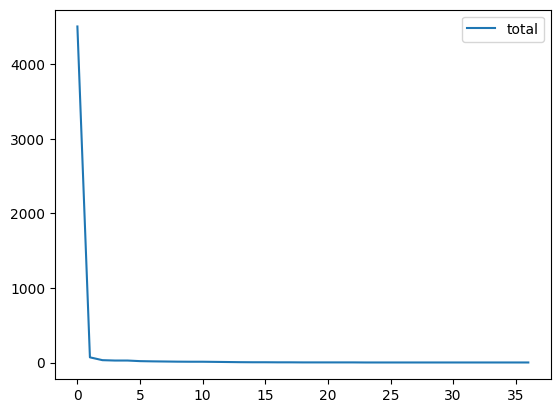

In [ ]:
# Esta variável possui vários parâmetros: Index e valores.
# tmdb["original_language"].value_counts().values.

contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"]
contagem_de_lingua.head()

contagem_de_lingua.plot()

<Axes: xlabel='original_language', ylabel='count'>

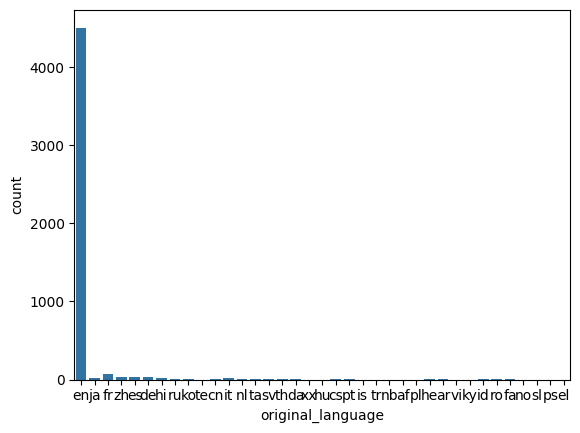

In [ ]:
#sns.barplot(data = contagem_de_lingua, x="original_language", y = "total")
# Esta forma é mais trabalhosa de visualizar.

sns.countplot(data=tmdb, x="original_language") #Voltado para variáveis categóricas.



In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_ingles = total_por_lingua.loc["en"]
total_ingles

total_geral = total_por_lingua.sum()
resto = total_geral - total_ingles

print(total_ingles, total_geral, resto)

4505 4803 298


In [ ]:
dados = {
  "lingua" : ["inglês", "outros"],
  "total" : [total_ingles, resto]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,inglês,4505
1,outros,298


In [ ]:
plt.pie(dados["total"], labels=dados["lingua"])
plt.title("Distribuição de línguas")
plt.show()

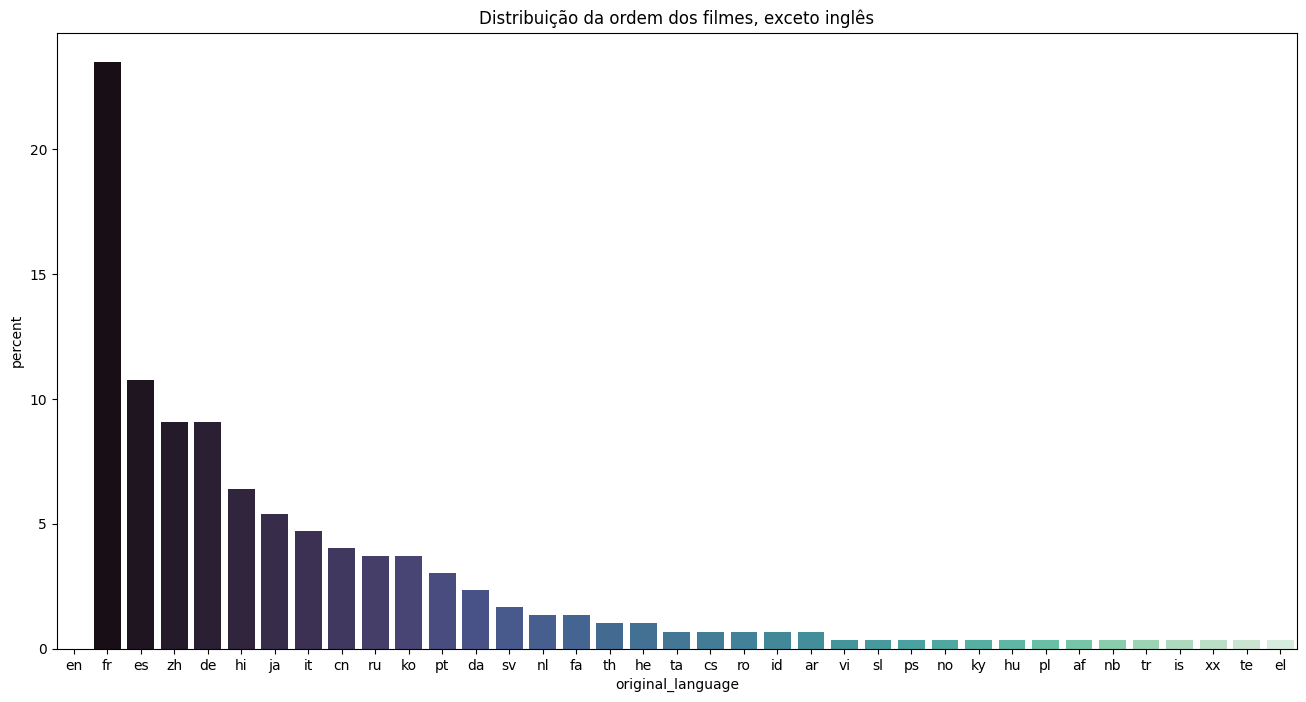

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order = total_por_lingua.index,
              palette="mako",
              hue="original_language",
              stat = "percent",
              hue_order = total_por_lingua.index,
              x="original_language")
plt.title("Distribuição da ordem dos filmes, exceto inglês")
plt.show()


In [ ]:
notas1 = [2]*3 + [4]*5
notas2 = [3]*4 + [50]*5
notas2
#plt.boxplot([notas1, notas2])
np.std(notas2)

23.354487764997803

In [ ]:
#First, we have to notice that exist some movies that appear just one time.
plt.boxplot([notas_do_toy_story,  notas_do_jumanji])
sns.boxplot(data = notas.query("filmeId in [1,2,3,4,5]"),
            x = "filmeId",
            palette = "Set2"
            y="nota")

In [ ]:
#groupby: Devo associar duas colunas da tabela.
notas.groupby("filmesId").count()

#In this way, it is possible to verify films that appear only once.
#This films doesn´t have a precise information associated with mean(),
#due only one note.